In [1]:
import os
import sys

# Get the path to the `src` directory
src_path = os.path.relpath('..')
sys.path.append(src_path)

from typing import List
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from src.types import *
from src.clustering.random import RandomClustering
from src.clustering.louvain import LouvainClustering
from src.clustering.greedy import GreedyClustering

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

%load_ext autoreload
%autoreload 2

---
### 1 - Select Periods - Build Graph

In [ ]:
# Path
data_path = os.path.relpath('../data/CAC40/FR_2013')

# Load data from a JSONL file
market = Market.loader('2013/10/01','2013/10/15', data_path)

 56%|█████▋    | 27/48 [06:52<08:03, 23.04s/it]

In [ ]:
# Get periods of length 15
periods = market.get_periods(period_length=3600)
print(f"Number of periods: {len(periods)}")

Number of periods: 14


: 

In [15]:
(periods[-6].feature_vector)

array([-1.94176144e-03,  7.49190887e-02,  8.26902502e-02, -2.12856414e+00,
                   nan,             nan,             nan,             nan,
        1.29743889e-03, -5.84221945e-01,  2.00025636e-01, -1.67349090e+01,
        4.06960206e-03, -5.12070163e-01,  1.13912904e-01,  5.38327645e+00,
        9.23050582e-04, -7.10122239e-01,  2.09302326e-02, -3.71599283e+00,
        1.88433926e-03, -4.70802676e-01, -8.04388890e-02,  8.47945007e-01,
        7.54129912e-04, -7.23279060e-01,  3.53517322e-01,  1.55599426e+00,
        4.02985781e-03, -2.43555043e-01,  1.34145503e-01, -6.32687717e+00,
        4.13483241e-03, -6.25067840e-01,  3.56582324e-01, -2.93982136e+00,
        3.70910076e-03, -5.29937504e-01, -1.00327248e-01,  1.08089338e+00,
       -8.02545601e-04,  3.21167678e-01, -2.66781883e-01, -8.55279955e-01,
        5.04008878e-04, -5.44761078e-01, -1.22820600e-01, -6.04302853e-01,
        6.18663013e-03, -4.43643829e-01, -2.84395697e-01,  1.64838377e+00,
        1.71211771e-03, -

In [27]:
datetime.fromtimestamp(periods[7].start)

datetime.datetime(2009, 10, 2, 16, 0)

In [26]:
periods[7].start

array([-1.        , -1.        , -1.        , -1.        ,         nan,
               nan, -0.07451225, -1.15887268, -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.  

[[ 1.00000000e+00  6.52341593e-02 -4.88994284e-01  7.92054787e-02
  -5.82669882e-01  6.69220583e-02  3.37897240e-01  1.54525224e-02
   1.29454804e-01 -3.08742854e-02 -6.12490957e-02 -1.27791405e-01
   1.71591738e-01 -4.07200471e-01]
 [ 6.52341593e-02  1.00000000e+00 -9.18212415e-03 -2.88995016e-02
   6.01887627e-02  9.19643716e-02  1.46937034e-01  1.07645224e-02
   3.18910349e-02  1.01363149e-02 -2.89386704e-01  4.50588708e-02
   1.57659688e-01  1.01143368e-01]
 [-4.88994284e-01 -9.18212415e-03  1.00000000e+00 -1.20298491e-01
   2.21274679e-01 -2.48173874e-02 -1.32272303e-01 -5.72258053e-02
  -1.14439490e-02 -5.64333799e-02  6.78234739e-02 -7.64770359e-02
  -3.10234114e-02  2.97677474e-01]
 [ 7.92054787e-02 -2.88995016e-02 -1.20298491e-01  1.00000000e+00
   1.86901565e-04  2.80594262e-02  3.32655213e-02 -2.25897877e-03
  -3.49294720e-02  3.82361430e-02  1.10178976e-01  8.60118310e-01
   1.14554173e-01  1.26319390e-01]
 [-5.82669882e-01  6.01887627e-02  2.21274679e-01  1.86901565e-04
  

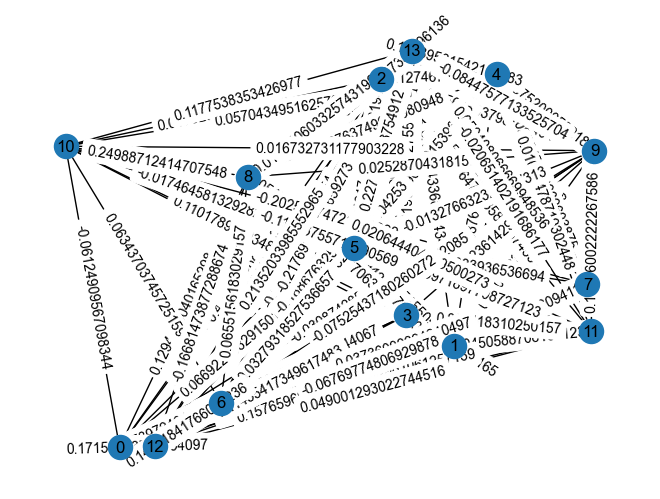

In [30]:
# Build the graph
state_graph = market.build_graph(periods, threshold=0.01, inter=True)


---
### 2 - Clustering

### 2.1 - Louvain Clustering

In [31]:
# Clustering process
clustering = LouvainClustering().fit(periods, G=state_graph)

# Get the clusters
clusters = clustering.clusters

print(f"Number of periods: {len(periods)}")
print(f"Number of clusters: {len(clusters)}")
print(f"Cluster sizes: {[len(cluster) for cluster in clusters]}")
#print(f"Cluster centers: {clustering.cluster_centers}")
print(f"Transition matrix: \n{clustering.transition_matrix}")

Number of periods: 14
Number of clusters: 3
Cluster sizes: [4, 5, 4]
Transition matrix: 
[[0.5  0.25 0.25]
 [0.2  0.2  0.6 ]
 [0.25 0.75 0.  ]]


Count of periods per time:
08:00 : 1
09:00 : 1
10:00 : 2
11:00 : 2
12:00 : 2
13:00 : 2
14:00 : 2
15:00 : 1


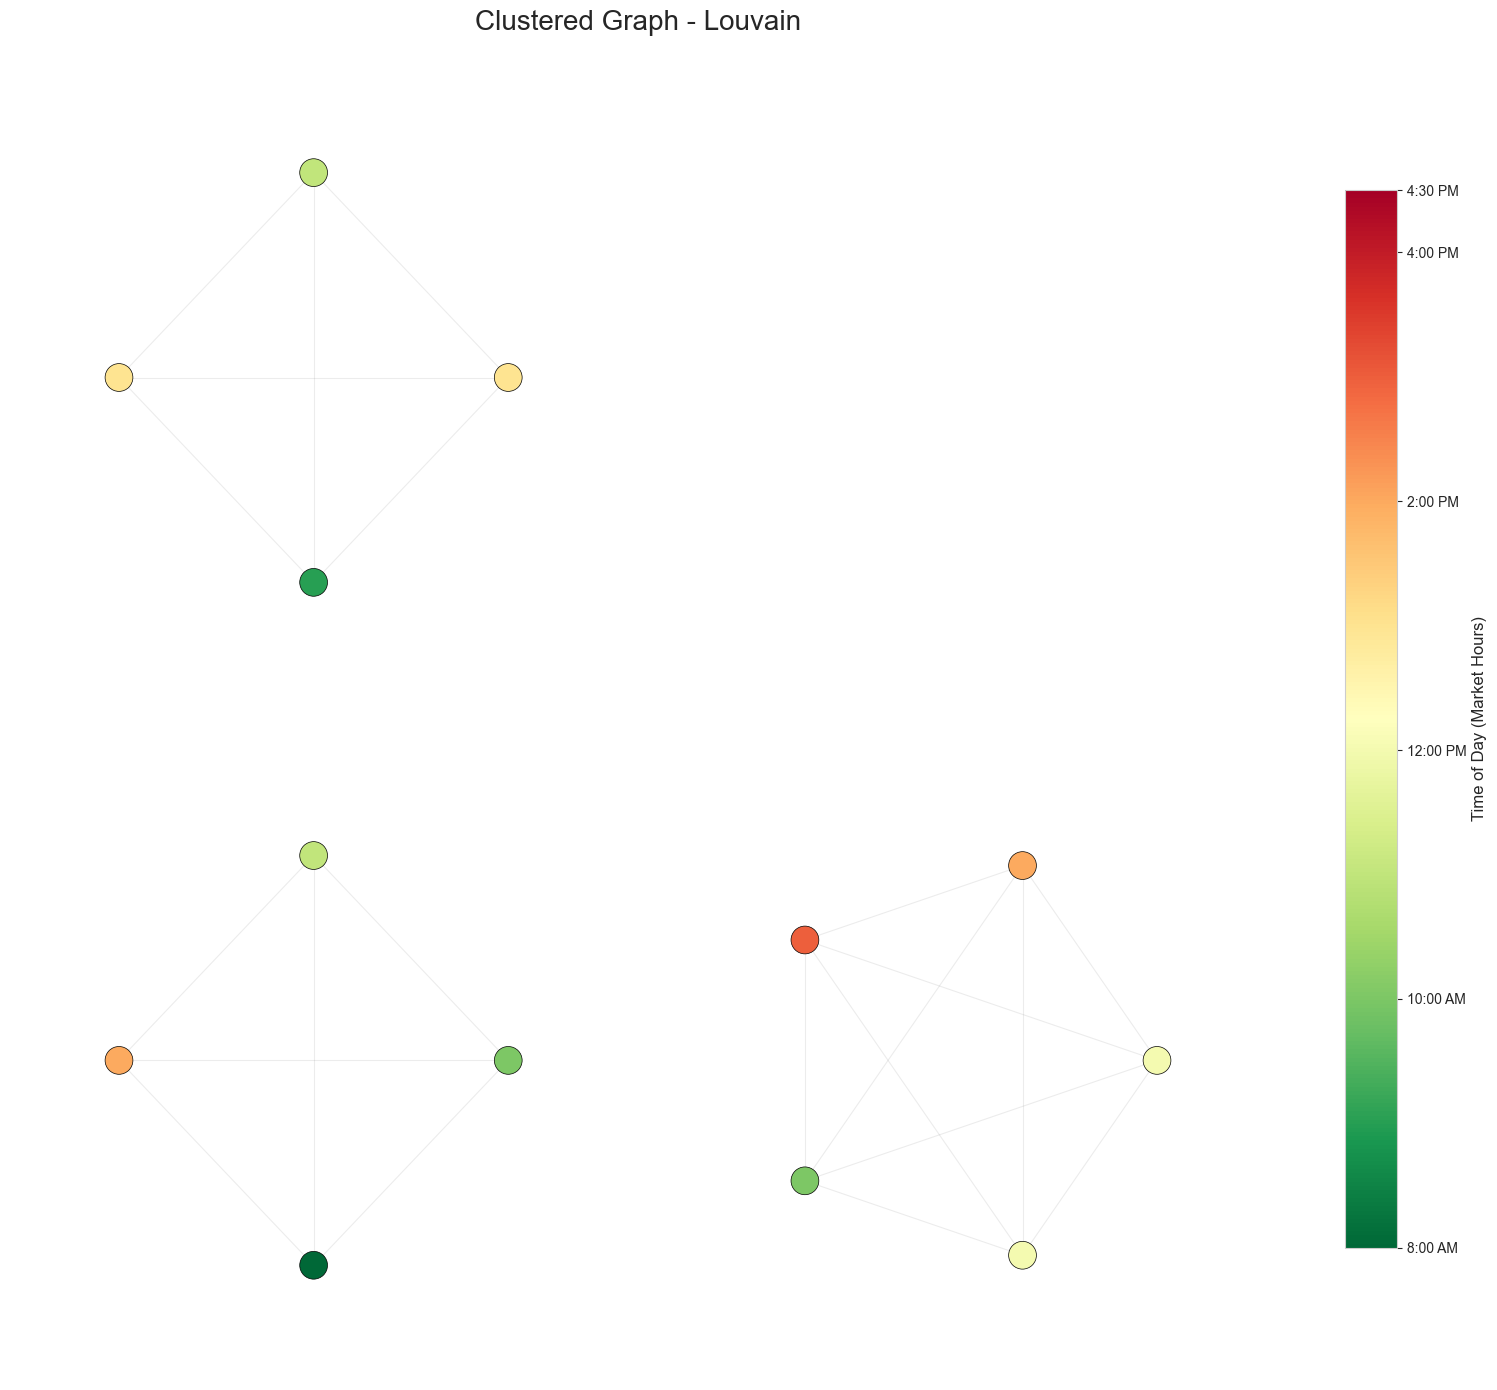

In [32]:
clustering.plot_cluster_2(method='Louvain')

### 2.2 - Greedy Clustering

In [112]:
clustering = GreedyClustering().fit(periods, G=state_graph)

# Get the clusters
clusters = clustering.clusters

print(f"Number of periods: {len(periods)}")
print(f"Number of clusters: {len(clusters)}")
print(f"Cluster sizes: {[len(cluster) for cluster in clusters]}")
#print(f"Cluster centers: {clustering.cluster_centers}")
print(f"Transition matrix: \n{clustering.transition_matrix}")

Number of periods: 175
Number of clusters: 6
Cluster sizes: [74, 54, 27, 14, 4, 1]
Transition matrix: 
[[0.36486486 0.2972973  0.2027027  0.08108108 0.04054054 0.01351351]
 [0.44444444 0.27777778 0.16666667 0.09259259 0.01851852 0.        ]
 [0.55555556 0.37037037 0.07407407 0.         0.         0.        ]
 [0.5        0.35714286 0.         0.14285714 0.         0.        ]
 [0.25       0.25       0.25       0.25       0.         0.        ]
 [1.         0.         0.         0.         0.         0.        ]]


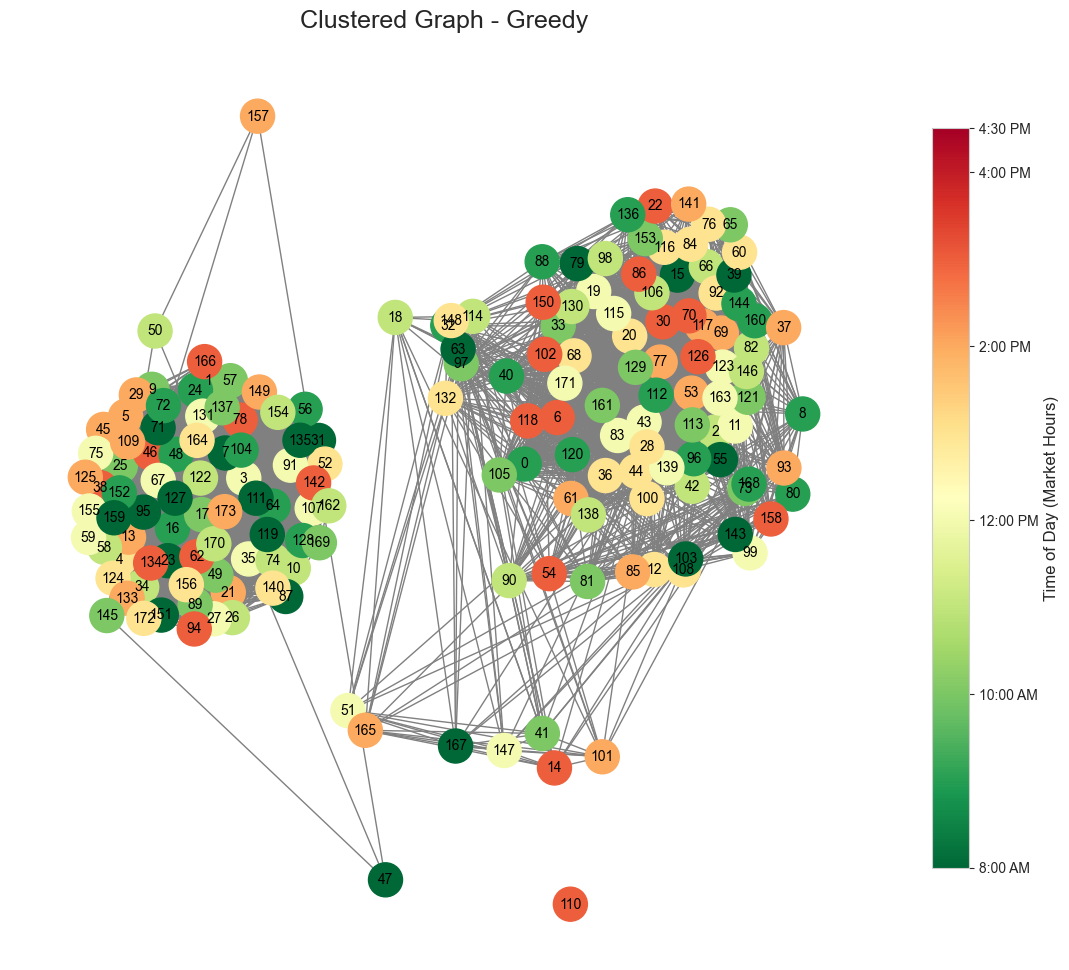

In [114]:
clustering.plot_cluster(method='Greedy')